In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from pca_utils import plot_widget
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
import matplotlib.pyplot as plt
import plotly.offline as py

In [2]:
X = np.array([[ 99,  -1],
       [ 98,  -1],
       [ 97,  -2],
       [101,   1],
       [102,   1],
       [103,   2]])

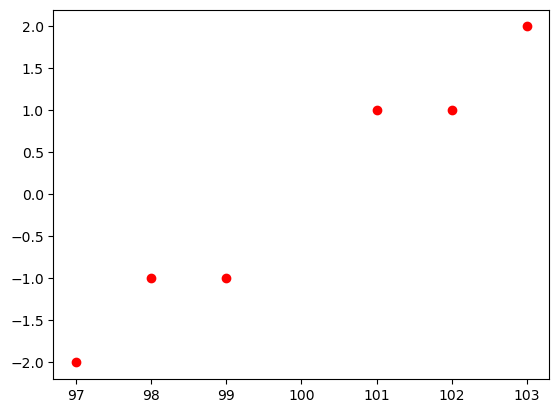

In [3]:
plt.plot(X[:,0],X[:,1], 'ro')

In [4]:
# loading the PCA algorithm

pca_2 = PCA(n_components = 2)

pca_2

PCA(n_components=2)

In [5]:
pca_2.fit(X)

PCA(n_components=2)

In [6]:
pca_2.explained_variance_ratio_

array([0.99244289, 0.00755711])

In [7]:
X_trans_2 = pca_2.transform(X)
X_trans_2

array([[ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385],
       [-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385]])

In [9]:
pca_1 = PCA(n_components = 1)
pca_1

PCA(n_components=1)

In [10]:
pca_1.fit(X)
pca_1.explained_variance_ratio_

array([0.99244289])

In [11]:
X_trans_1 = pca_1.transform(X)
X_trans_1

array([[ 1.38340578],
       [ 2.22189802],
       [ 3.6053038 ],
       [-1.38340578],
       [-2.22189802],
       [-3.6053038 ]])

In [12]:
X_reduced_2 = pca_2.inverse_transform(X_trans_2)
X_reduced_2 

array([[ 99.,  -1.],
       [ 98.,  -1.],
       [ 97.,  -2.],
       [101.,   1.],
       [102.,   1.],
       [103.,   2.]])

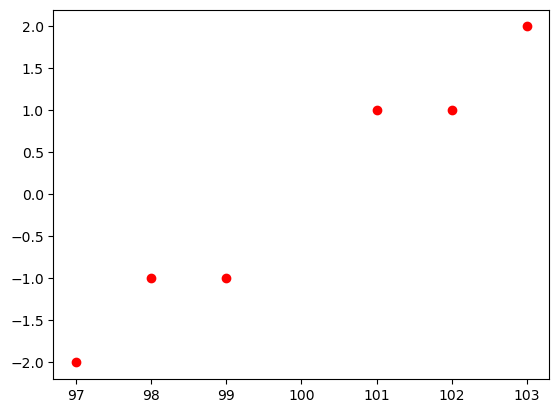

In [13]:
plt.plot(X_reduced_2[:,0], X_reduced_2[:,1], 'ro')

In [14]:
X_reduced_1 = pca_1.inverse_transform(X_trans_1)
X_reduced_1

array([[ 98.84002499,  -0.75383654],
       [ 98.13695576,  -1.21074232],
       [ 96.97698075,  -1.96457886],
       [101.15997501,   0.75383654],
       [101.86304424,   1.21074232],
       [103.02301925,   1.96457886]])

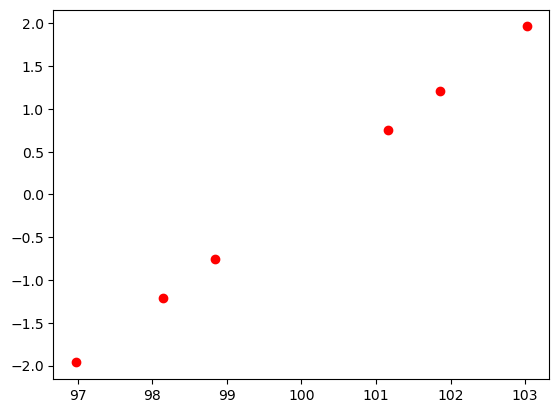

In [15]:
plt.plot(X_reduced_1[:,0], X_reduced_1[:,1], 'ro')

#### Using PCA in Exploratory Data Analysis

In [16]:
df = pd.read_csv('toy_dataset.csv')

In [17]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_990,feature_991,feature_992,feature_993,feature_994,feature_995,feature_996,feature_997,feature_998,feature_999
0,27.422157,-29.662712,-23.297163,-15.161935,0.345581,3.706750,-5.507209,-46.992476,5.175469,-47.768145,...,7.815960,24.320965,-33.987522,22.306088,31.173511,31.264830,8.380699,-25.843189,36.706408,-43.480792
1,3.489482,-19.153551,-14.636424,14.688258,20.114204,13.532852,34.298084,22.982509,37.938670,-35.648144,...,11.145527,-38.886603,44.579337,37.308519,29.560535,-10.643331,-6.499263,19.921666,-3.528982,31.068739
2,4.293509,22.691579,-1.045155,-8.740350,12.401082,31.362987,-18.831206,-35.384557,8.161430,-16.421762,...,48.190331,-0.503157,-21.740678,15.972237,1.122335,-45.473538,10.518065,-5.818320,-29.466301,-13.676685
3,-2.139348,23.158754,-26.241206,19.426465,9.472049,8.453948,0.637211,-26.675984,-43.823329,11.840874,...,-51.613076,13.278858,-44.179281,32.912282,4.805774,3.960836,-15.888356,61.384773,33.112334,5.088320
4,-35.251034,27.281816,-29.470282,-21.786865,11.806822,58.655133,5.375230,59.740676,-49.007717,-21.801155,...,0.010857,20.975655,-21.358371,18.709369,22.362477,41.214565,-7.217724,31.173870,37.097532,-27.509420


In [18]:
# 1000 features try to get 100 

def get_pairs(n = 100):
    from random import randint
    i = 0
    tuples = []
    while i <100:
        x = df.columns[randint(0,999)]
        y = df.columns[randint(0,999)]
        while x == y and (x,y) in tuples or (y,x) in tuples:
            y = df.columns[randint(0,999)]
        tuples.append((x,y))
        i += 1
    return tuples

In [19]:
pairs = get_pairs()

In [25]:
pairs[0]

('feature_108', 'feature_333')

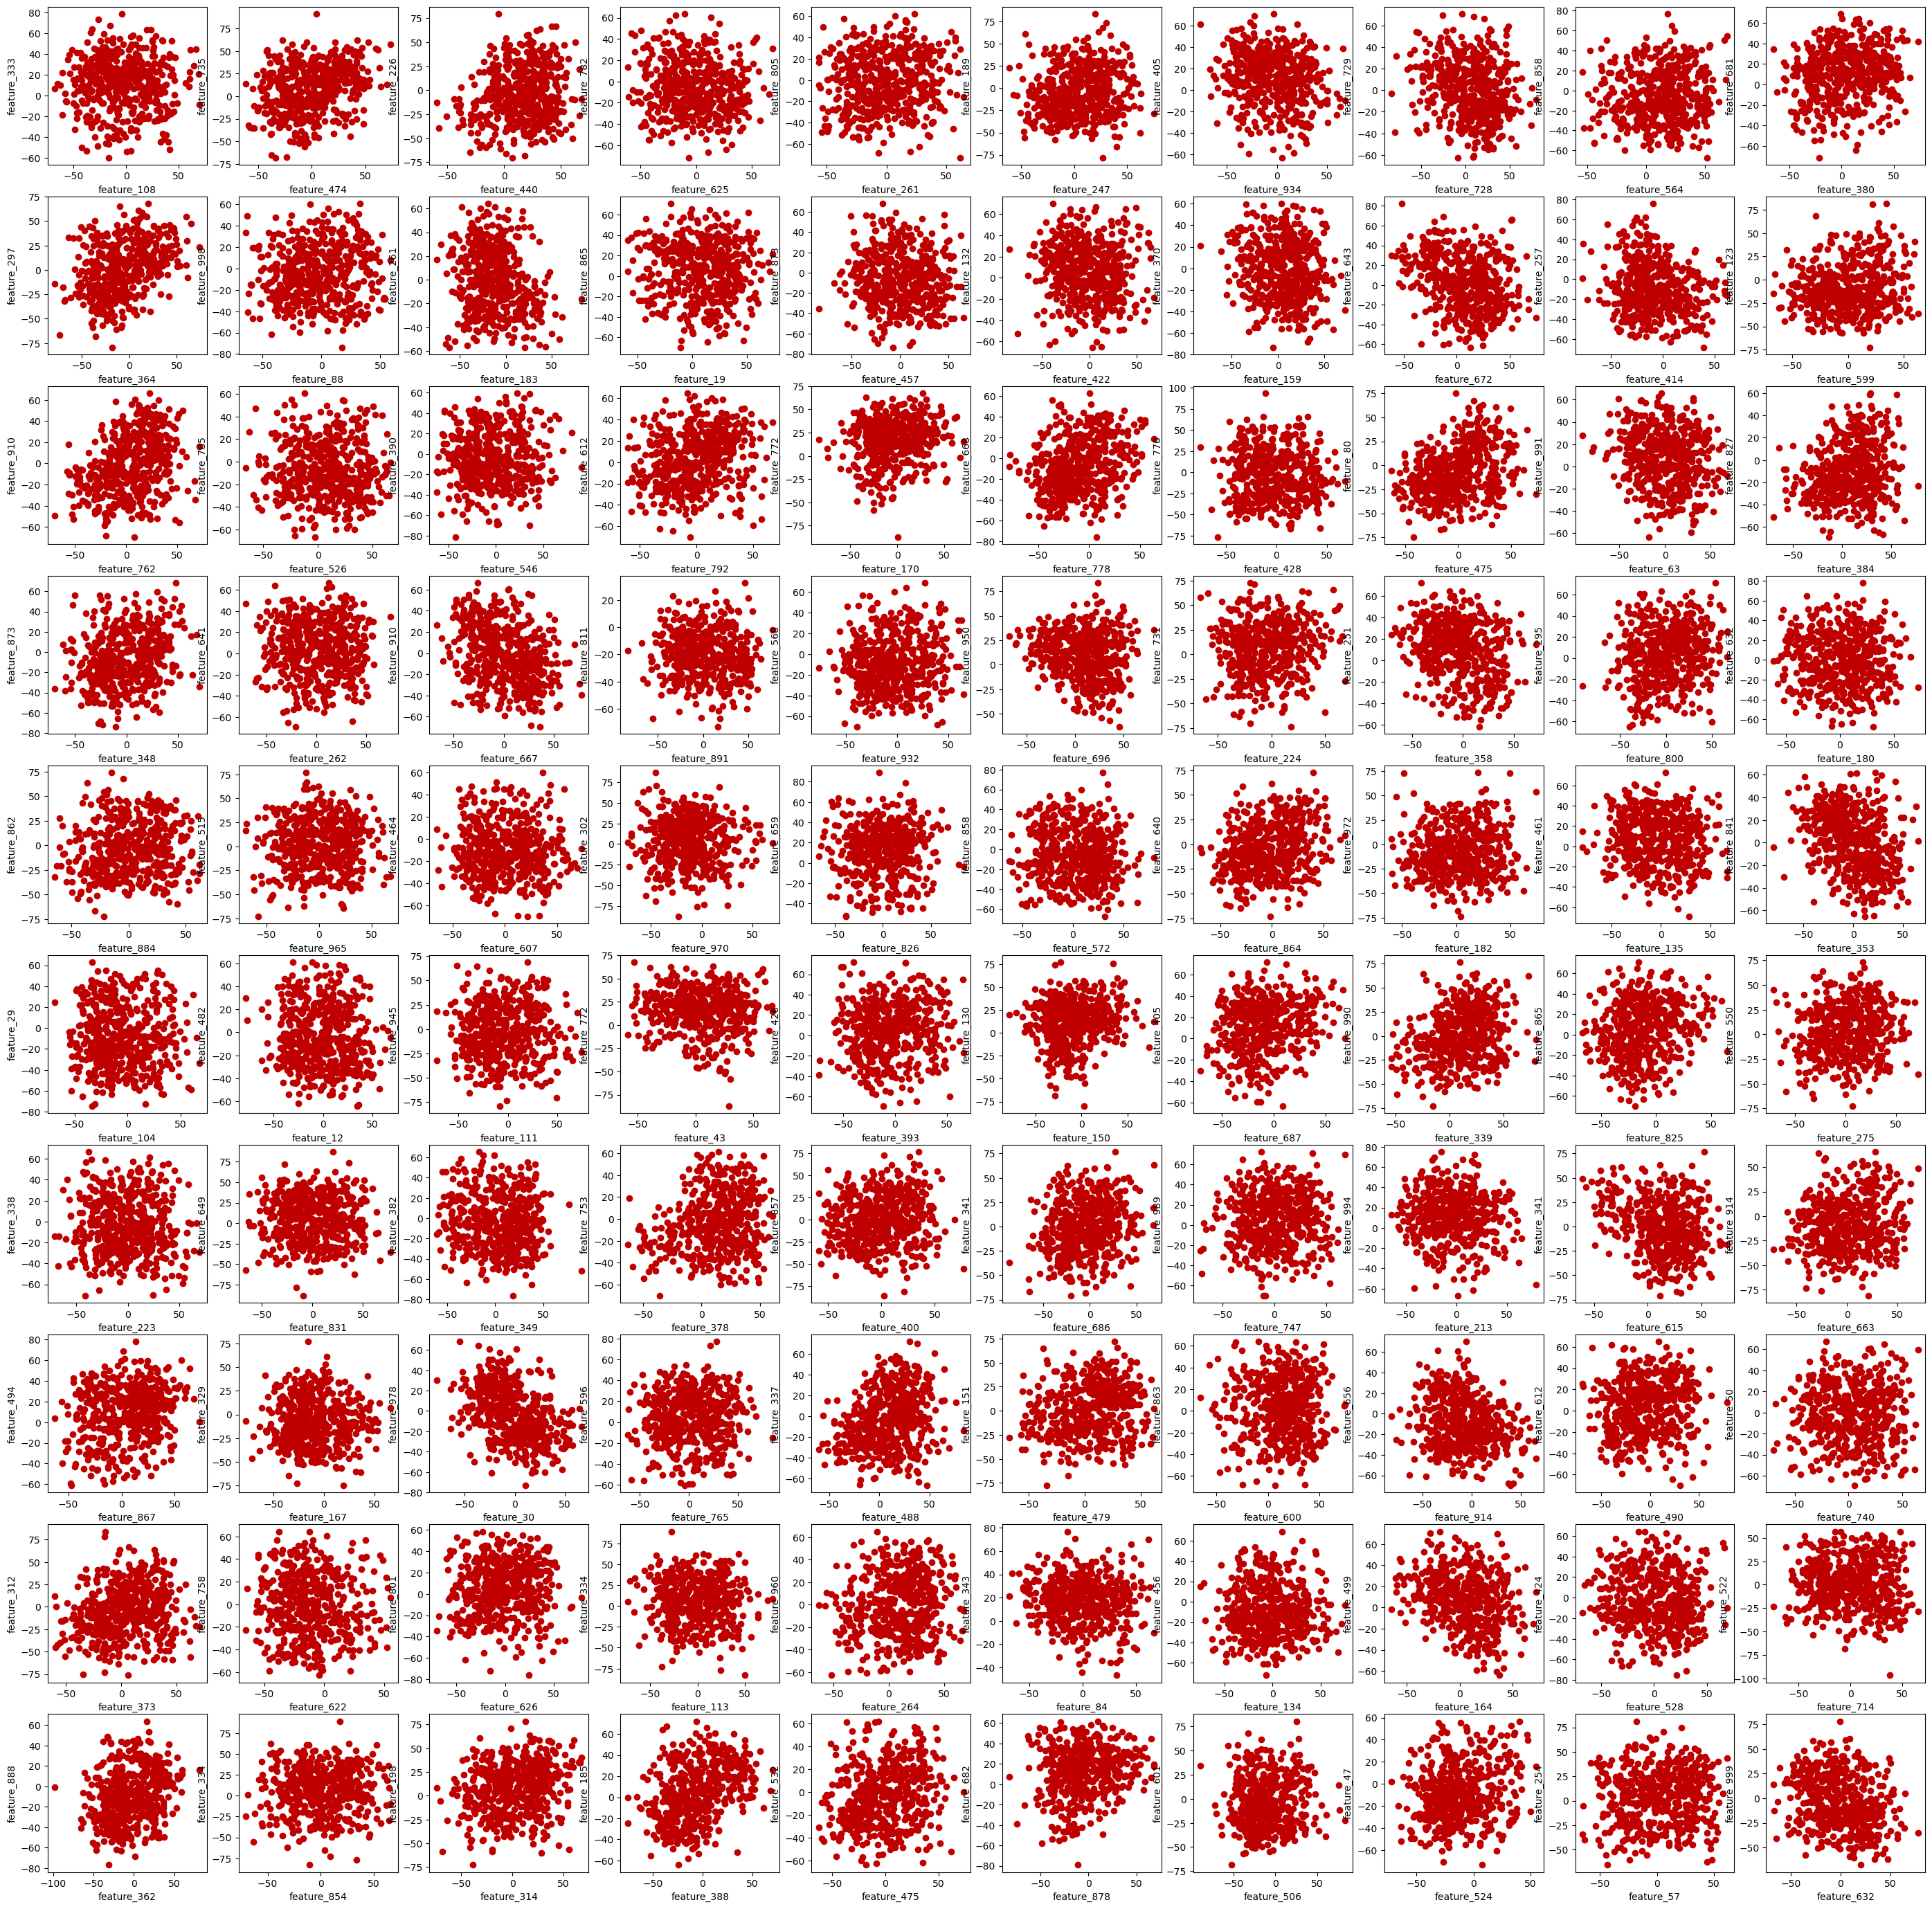

In [27]:
fig, axs = plt.subplots(10,10, figsize = (35,35))

i = 0

for rows in axs: # 每一行
    for ax in rows: # 每一行中的每一个
        ax.scatter(df[pairs[i][0]], df[pairs[i][1]], color = "#C00000")
        ax.set_xlabel(pairs[i][0])
        ax.set_ylabel(pairs[i][1])
        i += 1

In [29]:
corr = df.corr()

corr

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_990,feature_991,feature_992,feature_993,feature_994,feature_995,feature_996,feature_997,feature_998,feature_999
feature_0,1.000000,-0.103722,0.015784,-0.033219,-0.415358,-0.266933,-0.137141,-0.194403,0.162446,-0.083976,...,-0.120494,0.020968,0.078680,-0.033252,0.076851,0.042612,0.289716,-0.274962,0.027641,0.049573
feature_1,-0.103722,1.000000,0.337736,-0.171135,0.345884,0.185080,0.208196,-0.044625,-0.079949,-0.001948,...,-0.005403,0.123397,-0.250359,-0.090698,0.044208,0.018929,-0.260189,0.235876,-0.210954,0.047979
feature_2,0.015784,0.337736,1.000000,0.013961,0.345145,0.299024,0.039985,-0.100859,-0.038675,-0.154532,...,0.209160,0.232511,-0.061087,-0.135484,-0.111952,0.006617,-0.072219,0.012333,-0.229972,-0.076818
feature_3,-0.033219,-0.171135,0.013961,1.000000,0.142227,0.183382,0.049378,-0.088616,-0.116847,-0.152066,...,-0.040119,-0.256840,-0.015278,-0.185727,-0.144647,-0.050576,0.199677,0.040579,-0.014650,0.171000
feature_4,-0.415358,0.345884,0.345145,0.142227,1.000000,0.383280,0.277062,0.180477,-0.096038,-0.016284,...,0.220092,0.101415,-0.006388,-0.115772,-0.004572,-0.031877,-0.233503,0.214242,-0.199061,0.012381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_995,0.042612,0.018929,0.006617,-0.050576,-0.031877,0.002757,0.131874,-0.085383,-0.005111,0.348188,...,0.024636,0.300726,-0.111659,-0.174067,0.176845,1.000000,0.007601,0.108621,0.332544,-0.374151
feature_996,0.289716,-0.260189,-0.072219,0.199677,-0.233503,0.005054,-0.197800,-0.068711,-0.263666,-0.201586,...,-0.265101,0.042686,-0.042798,-0.141298,-0.022569,0.007601,1.000000,-0.297023,0.093343,-0.167742
feature_997,-0.274962,0.235876,0.012333,0.040579,0.214242,-0.079437,0.143915,-0.141962,0.029627,0.210807,...,0.013300,-0.059288,-0.125165,-0.183001,0.040979,0.108621,-0.297023,1.000000,-0.085454,-0.056337
feature_998,0.027641,-0.210954,-0.229972,-0.014650,-0.199061,0.093945,-0.087634,-0.147473,-0.048616,0.280748,...,-0.065135,0.040369,-0.200637,0.140856,-0.071527,0.332544,0.093343,-0.085454,1.000000,-0.126505


In [35]:
mask = (abs(corr)>0.5) & (abs(corr) != 1)

#### where（）函数https://www.zhihu.com/question/62844162

In [44]:
corr.where(mask).stack().sort_values()

feature_81   feature_657   -0.631294
feature_657  feature_81    -0.631294
feature_313  feature_4     -0.615317
feature_4    feature_313   -0.615317
feature_716  feature_1     -0.609056
                              ...   
feature_792  feature_547    0.620864
feature_35   feature_965    0.631424
feature_965  feature_35     0.631424
feature_395  feature_985    0.632593
feature_985  feature_395    0.632593
Length: 1870, dtype: float64

In [49]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(X_pca, columns = ['principal_component_1','principal_component_2'])

In [50]:
df_pca.head()

,principal_component_1,principal_component_2
0,-46.235641,-1.672797
1,-210.208758,-84.068249
2,-26.352795,-127.895751
3,-116.106804,-269.368256
4,-110.183605,-279.657306


Text(0.5, 1.0, 'PCA_decomposition')

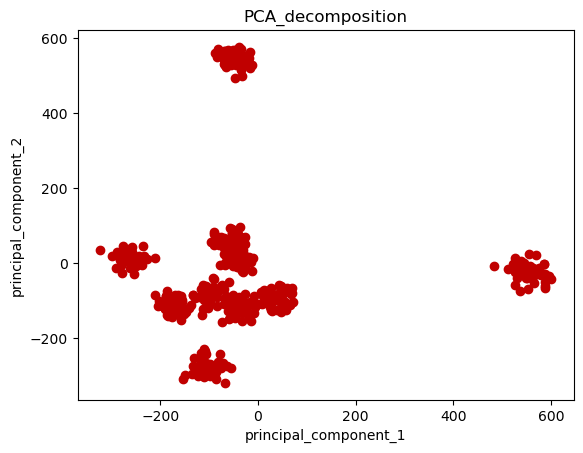

In [51]:
plt.scatter(df_pca['principal_component_1'], df_pca['principal_component_2'], color = '#C00000')

plt.xlabel('principal_component_1')

plt.ylabel('principal_component_2')

plt.title('PCA_decomposition')

In [52]:
sum(pca.explained_variance_ratio_)

0.14572843555106285